### 对ax,fig的分析

In [ ]:
# 想运行代码的话 记得先修改一下你的文件路径
path = 'E:\\Python\\python项目\\数据科学与机器学习\\数据集合\\'

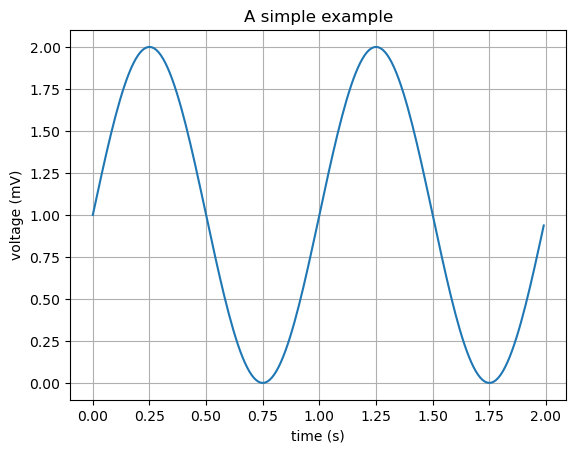

In [2]:
"""
第一个图
去掉ax, fig
也能画出来
"""

# 包含ax,fig的例子，即原代码
import matplotlib.pyplot as plt
import numpy as np
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='A simple example')
ax.grid()
plt.show()


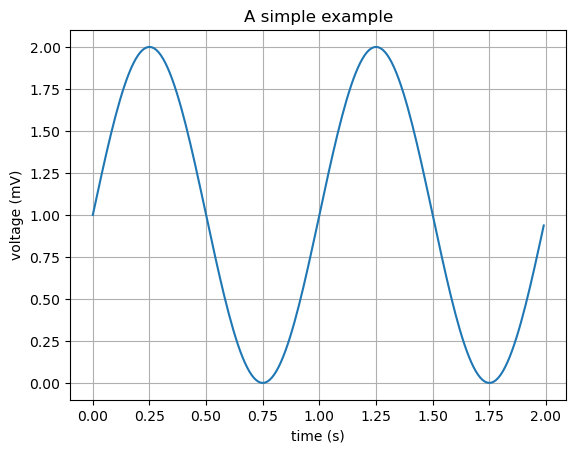

In [3]:
# 第一个图不包含ax,fig的例子
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
plt.plot(t, s)
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('A simple example')
plt.grid()
plt.show()

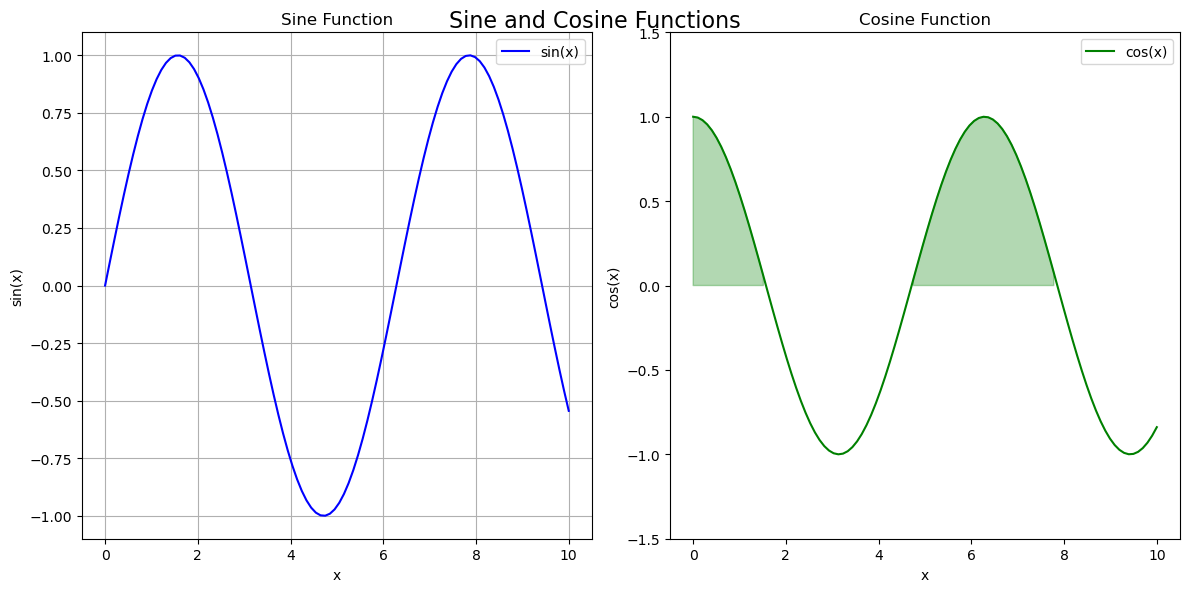

In [4]:
# AI写的代码，ax、fig的复杂情况
import matplotlib.pyplot as plt  
import numpy as np  
  
# 创建数据  
x = np.linspace(0, 10, 100)  
y1 = np.sin(x)  
y2 = np.cos(x)  
  
# 创建一个图形对象和一个包含两个子图的轴对象数组  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1行2列的子图  
  
# 第一个子图  
ax1.plot(x, y1, label='sin(x)', color='blue')  
ax1.set_title('Sine Function')  
ax1.set_xlabel('x')  
ax1.set_ylabel('sin(x)')  
ax1.grid(True)  # 添加网格  
ax1.legend()    # 添加图例  
  
# 第二个子图  
ax2.plot(x, y2, label='cos(x)', color='green')  
ax2.set_title('Cosine Function')  
ax2.set_xlabel('x')  
ax2.set_ylabel('cos(x)')  
ax2.set_ylim(-1.5, 1.5)  # 设置y轴的显示范围  
ax2.fill_between(x, y2, where=(y2 > 0), color='green', alpha=0.3)  # 填充y2>0的区域  
ax2.legend()             # 添加图例  
  
# 调整子图之间的间距  
plt.tight_layout()  
  
# 添加图形级别的标题  
fig.suptitle('Sine and Cosine Functions', fontsize=16, y=0.98)  # y参数调整标题位置  
  
# 显示图形  
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


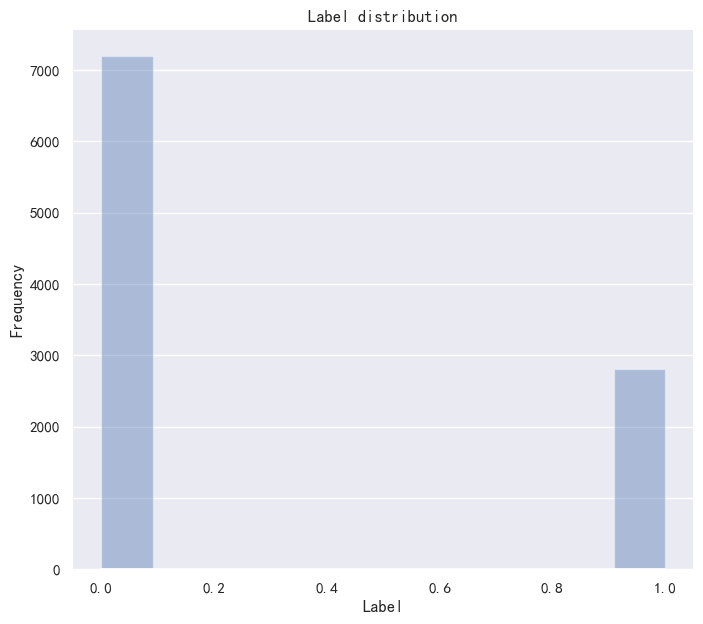

In [10]:
# 我们先来看第三张图 
"""
我们就变一个东西：
sns.displot
sns.distplot
sna.histplot
我们来比较一下结果
"""

"""
先说结论，你也可以看完代码和运行结果后再来看：
distplot是seaborn里较老的版本（看报错的提示`distplot` is a deprecated function and will be removed in a future version）
它能够接受使用f,ax。所以可以通过f,ax来修改图形的画布与轴。

displot是基于figure-level 的函数，其需要（也不应该）直接传递fig或ax对象给这些函数。
所以当你传递fig,ax时，并不会影响displot，你最后得到两张图，
一个是displot函数绘制出的图，另一张是那你设置的fig,ax的空图。
仔细观察，你会发现，你设置的标题 轴标题都体现在第一张空图上了。

hisplot是基于axaxes-level function ,它可以接受fig和ax的传递，
故最后得出的结果是一张图。
"""

# 第一个，sns.distplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def label_distribution(Data):
    f, ax = plt.subplots(figsize=(8, 7)) 
    sns.distplot(Data['标签'], color="b", kde=False);
    ax.xaxis.grid(False)
    ax.set(ylabel="Frequency", xlabel="Label", title="Label distribution")
    sns.despine(trim=True, left=True)
    plt.show()
overdue_train = pd.read_csv(path + "overdue.csv")
label_distribution(overdue_train)

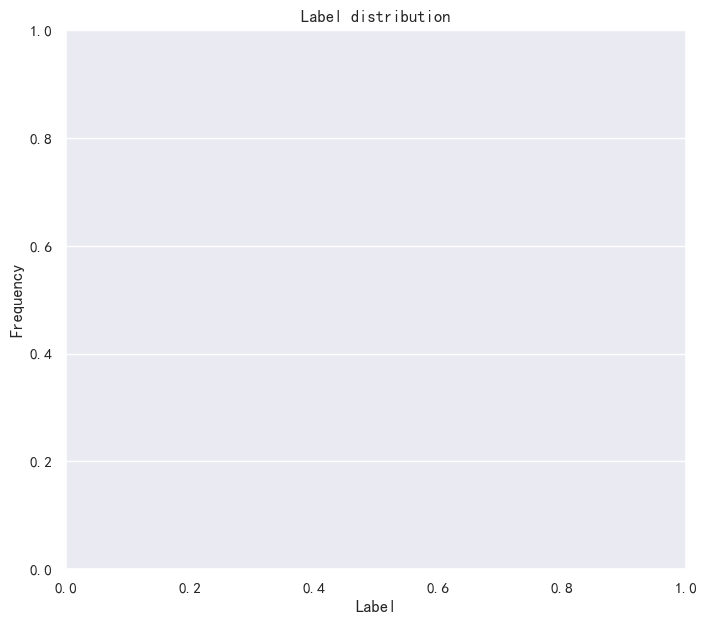

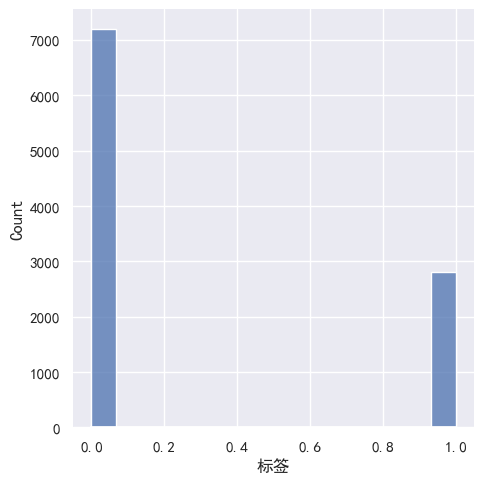

In [12]:
# 第二个，sns.displot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def label_distribution(Data):
    f, ax = plt.subplots(figsize=(8, 7)) 
    sns.displot(Data['标签'], color="b", kde=False);
    ax.xaxis.grid(False)
    ax.set(ylabel="Frequency", xlabel="Label", title="Label distribution")
    sns.despine(trim=True, left=True)
    plt.show()
overdue_train = pd.read_csv(path + "overdue.csv")
label_distribution(overdue_train)

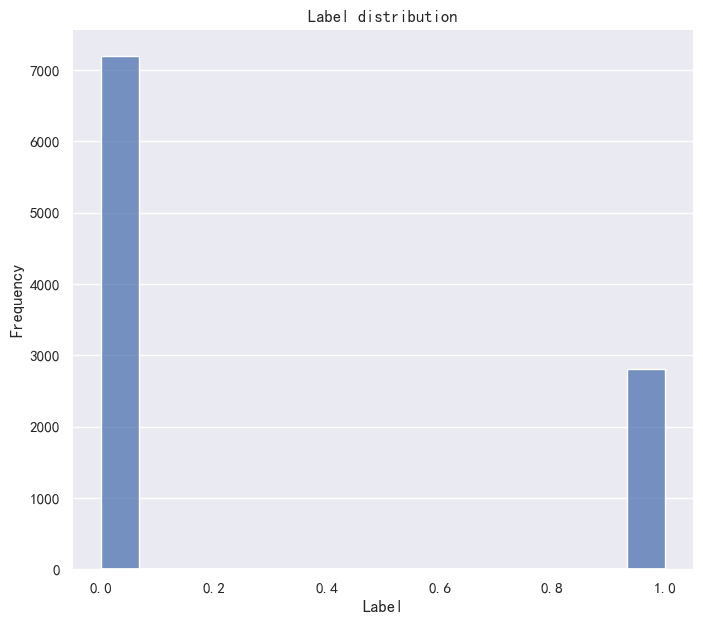

In [14]:
# 第三个，sns.histplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def label_distribution(Data):
    f, ax = plt.subplots(figsize=(8, 7)) 
    sns.histplot(Data['标签'], color="b", kde=False);
    ax.xaxis.grid(False)
    ax.set(ylabel="Frequency", xlabel="Label", title="Label distribution")
    sns.despine(trim=True, left=True)
    plt.show()
overdue_train = pd.read_csv(path + "overdue.csv")
label_distribution(overdue_train)

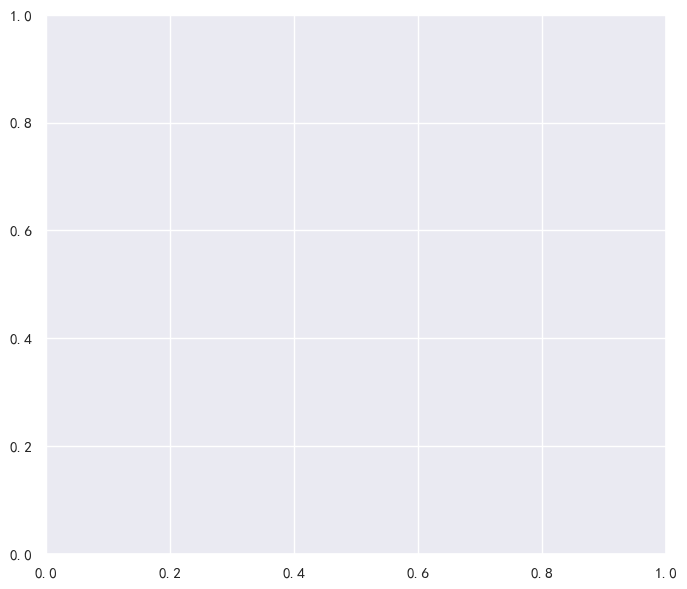

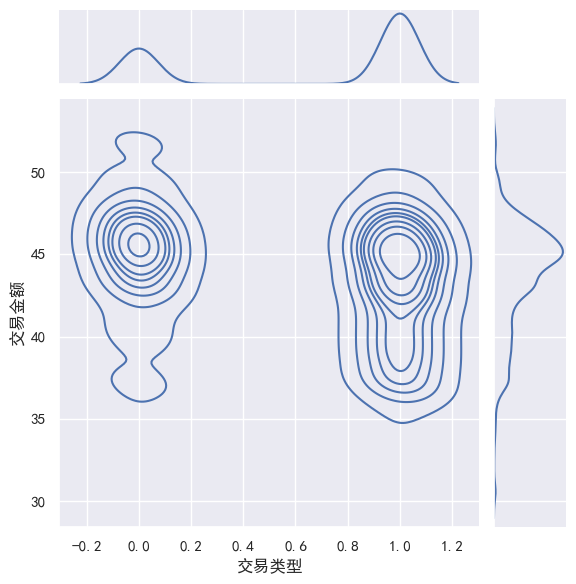

In [15]:
# 第二张图，原有代码
"""
sns.jointplot是基于figure-level的函数
因此，如果也不接受ax,fig的传递
我们看一看加入ax,fig的情况
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def joint(Data):
    f, ax = plt.subplots(figsize=(8, 7)) 
    sns.set(font = 'SimHei')  # 设置字体为中文的SimHei
    plt.rcParams['axes.unicode_minus'] = False  # 修正图的零位置
    sns.jointplot(x = '交易类型', y = '交易金额', data = Data, kind='kde')  # kde：概率密度曲线
    plt.show()

bank = pd.read_csv(path + 'bank.csv')

bank_train = bank.loc[0:10000,['new_user_id', '交易时间戳', '交易类型', '交易金额', '工资收入标记']]

joint(bank_train)

    count
标签       
0    7198
1    2802


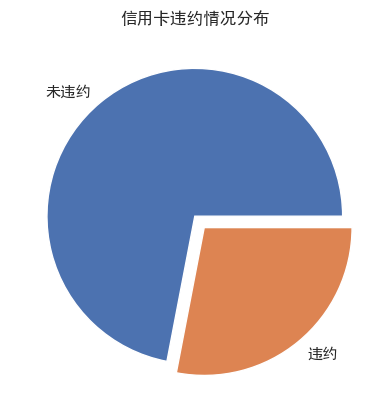

In [18]:
# 饼图也可以用ax,fig，这适用于更加复杂的情况

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def label_distribution(Data):
    plt.rcParams['font.sans-serif']=['SimHei']
    """按照label分组，在关于label进行计数"""
    agg_label = Data.groupby(["标签"])["标签"].agg(["count"])  
    print(agg_label) # 显示分组后计算聚合函数的情况

    fig, ax = plt.subplots()  
    ax.pie(agg_label['count'],explode=[0, 0.1], labels=['未违约','违约'])
    """
    explode=[0, 0.1]：这个列表与agg_label['count']中的数据一一对应。
    列表中的第一个元素0表示第一个数据点（即“未违约”部分）没有爆炸效果，保持原位。
    而第二个元素0.1表示第二个数据点（即“违约”部分）将偏离原位0.1个单位
    """
    ax.set(title="信用卡违约情况分布")
    plt.show()
overdue_train = pd.read_csv(path + "overdue.csv")
label_distribution(overdue_train)